In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt


Question #1

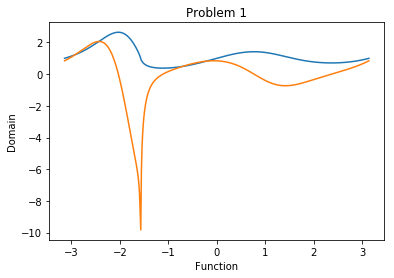

In [15]:
x = sy.symbols('x')
func0 = lambda x: (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
func1 = lambda t: sy.diff((sy.sin(x) + 1)**(sy.sin(sy.cos(x))),x).evalf(subs={x:t})
grid = np.linspace(-np.pi,np.pi,500)
f0grid = np.zeros(len(grid))
f1grid = np.zeros(len(grid))
for i in range(len(grid)):
    f0grid[i] = func0(grid[i])
    f1grid[i] = func1(grid[i])
                                                                
plt.plot(grid,f0grid)
plt.plot(grid,f1grid)  
plt.xlabel("Function")
plt.ylabel("Domain")
plt.title("Problem 1")
plt.show()

Question #2

Derivative at x = 10 , Method 1   : 0.841466912403
Derivative at x = 10 , Method 2   : 0.841470985528
Derivative at x = 10 , Method 3   : 0.841475054347
Derivative at x = 10 , Method 4   : 0.841470985528
Derivative at x = 10 , Method 5   : 0.841470984449
Derivative at x = 10 , Method 6   : 0.841470984808


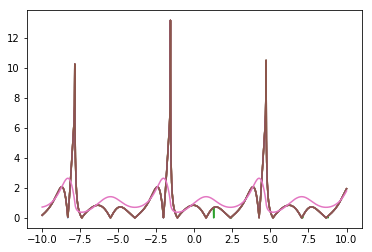

In [7]:
def f_func(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))

def griddler(grid,conv,f):
    return np.array([conv(f,k) for k in grid])

def converge1(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(f(x+h) - f(x))
        v = e/h
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Deterivate could not be computed"
    return v

def converge2(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(4*f(x+h) - 3*f(x) - f(x+2*h))
        v = e/(2*h)
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Deterivate could not be computed"
    return v

def converge3(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(-f(x-h) + f(x))
        v = e/h
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Deterivate could not be computed"
    return v

def converge4(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(-4*f(x+h) + 3*f(x) + f(x+2*h))
        v = e/(2*h)
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Deterivate could not be computed"
    return v

def converge5(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(f(x+h) - f(x-h))
        v = e/(2*h)
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Derivative could not be computed"
    return v

def converge6(f,x):
    h,e,t,tol,it_count = 1,1,0,0.0001,50
    while e > tol and t < it_count:
        e = abs(-8*f(x-h) + 8*f(x+h) + f(x-2*h) - f(x+2*h))
        v = e/(12*h)
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Derivative could not be computed"
    return v

x = 10
grid = np.linspace(-10,10,1000)
print("Derivative at x =",x,", Method 1   :",converge1(f_func,0))
print("Derivative at x =",x,", Method 2   :",converge2(f_func,0))
print("Derivative at x =",x,", Method 3   :",converge3(f_func,0))
print("Derivative at x =",x,", Method 4   :",converge4(f_func,0))
print("Derivative at x =",x,", Method 5   :",converge5(f_func,0))
print("Derivative at x =",x,", Method 6   :",converge6(f_func,0))
primegrid1 = griddler(grid,converge1,f_func)
primegrid2 = griddler(grid,converge2,f_func)
primegrid3 = griddler(grid,converge3,f_func)
primegrid4 = griddler(grid,converge4,f_func)
primegrid5 = griddler(grid,converge5,f_func)
primegrid6 = griddler(grid,converge6,f_func)
plt.plot(grid,primegrid1)
plt.plot(grid,primegrid2)
plt.plot(grid,primegrid3)
plt.plot(grid,primegrid4)
plt.plot(grid,primegrid5)
plt.plot(grid,primegrid6)
plt.plot(grid,f_func(grid))
plt.show()

Question #3

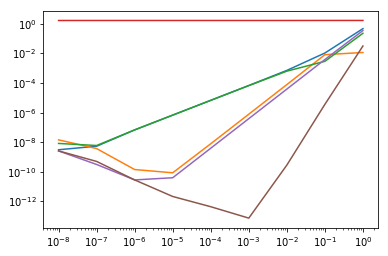

In [30]:
x0 = 0

loggrid = np.logspace(-8,0,9)
fg = func1(x0)
def conv1(f,x,h):
    return (f(x+h) - f(x))/h
def conv2(f,x,h):
    return (4*f(x+h) - 3*f(x) - f(x+2*h))/(2*h)
def conv3(f,x,h):
    return (-f(x-h) + f(x))/h
def conv4(f,x,h):
    return (-4*f(x+h) + 3*f(x) + f(x+2*h))/(2*h)
def conv5(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)
def conv6(f,x,h):
    return (-8*f(x-h) + 8*f(x+h) + f(x-2*h) - f(x+2*h))/(12*h)

fgrid1 = np.array([abs(fg - conv1(f_func,x0,h)) for h in loggrid])
fgrid2 = np.array([abs(fg - conv2(f_func,x0,h)) for h in loggrid])
fgrid3 = np.array([abs(fg - conv3(f_func,x0,h)) for h in loggrid])
fgrid4 = np.array([abs(fg - conv4(f_func,x0,h)) for h in loggrid])
fgrid5 = np.array([abs(fg - conv5(f_func,x0,h)) for h in loggrid])
fgrid6 = np.array([abs(fg - conv6(f_func,x0,h)) for h in loggrid])
#for i in range(len(gridn)):
#    plt.plot()
plt.plot(loggrid,fgrid1)
plt.plot(loggrid,fgrid2)
plt.plot(loggrid,fgrid3)
plt.plot(loggrid,fgrid4)
plt.plot(loggrid,fgrid5)
plt.plot(loggrid,fgrid6)

plt.xscale('log')
plt.yscale('log')
plt.show()

Question #4

In [59]:
plane = np.load("plane.npy")
plane[:,0] = plane[:,0] - 7*np.ones(8)
plane[:,1] = plane[:,1]/60
plane[:,2] = plane[:,2]/60
Xt,Yt,X1t,Y1t = np.zeros(len(plane)),np.zeros(len(plane)),np.zeros(len(plane)),np.zeros(len(plane))


for i in range(len(plane)):
    Xt[i] = plane[i,1] * ((np.tan(plane[i,2]))/(np.tan(plane[i,2] - np.tan(plane[i,1]))))
    Yt[i] = plane[i,1] * ((np.tan(plane[i,1]) * np.tan(plane[i,2]))/(np.tan(plane[i,2] - np.tan(plane[i,1]))))

Xt = [[x] for x in Xt]
Yt = [[x] for x in Yt]
plane = np.hstack((plane,Xt,Yt))

xfunc = lambda x: np.interp(x,plane[:,0],plane[:,3])
yfunc = lambda x: np.interp(x,plane[:,0],plane[:,4])

h = 0.00000001

X1t[0] = conv1(xfunc,plane[i,0],h)
Y1t[0] = conv1(yfunc,plane[i,0],h)
X1t[len(plane)-1] = conv3(xfunc,plane[i,0],h)
Y1t[len(plane)-1] = conv3(yfunc,plane[i,0],h)


for i in range(1,len(plane)-1):
    X1t[i] = conv5(xfunc,plane[i,0],h)
    Y1t[i] = conv5(yfunc,plane[i,0],h)

X1t = [[x] for x in X1t]
Y1t = [[x] for x in Y1t]

plane = np.hstack((plane,X1t,Y1t))

speed = np.zeros(len(plane))
for i in range(len(plane)):
    speed[i] = np.sqrt(plane[i,5]**2 + plane[i,6]**2)

speed = [[x] for x in speed]

plane = np.hstack((plane,speed))

Question #5

In [2]:
def f5(x,y):
    return [x**2,x**3-y]

def Prob5(f,x0,y0,h):
    fxy = f(x0,y0)
    return fxy

In [4]:
print(Prob5(f5,2,3,0.0001))

[4, 5]
